<a href="https://colab.research.google.com/github/U-Nila/Elonmusk_Emotion_Detector/blob/main/Emotion_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
                                                           #EMOTION_DETECTOR

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving elonmusk.csv to elonmusk.csv


In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/dataset/elonmusk.csv")
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1282939902531796993,1282933079431151618,1594711683000,2020-07-14,07:28:03,UTC,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN
1,1282844872571904000,1282801938111791104,1594689026000,2020-07-14,01:10:26,UTC,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN
2,1282805559834492929,1282758532312584193,1594679653000,2020-07-13,22:34:13,UTC,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN
3,1282800187308572672,1282671714657157120,1594678372000,2020-07-13,22:12:52,UTC,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN
4,1282800078000803840,1282739486816964615,1594678346000,2020-07-13,22:12:26,UTC,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN


In [4]:
print("Shape:",df.shape)
print("Columns:",df.columns.tolist())
df.info()
print(df.describe())
print("Missing values:/n",df.isnull().sum())
print("Duplicate rows:",df.duplicated().sum())



Shape: (9286, 34)
Columns: ['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone', 'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9286 entries, 0 to 9285
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               9286 non-null   int64  
 1   conversation_id  9286 non-null   int64  
 2   created_at       9286 non-null   int64  
 3   date             9286 non-null   object 
 4   time             9286 non-null   object 
 5   timezone         9286 non-null   object 
 6   user_id          9286 non-null   int64  
 7   username         9286 non-null   object 
 8   name   

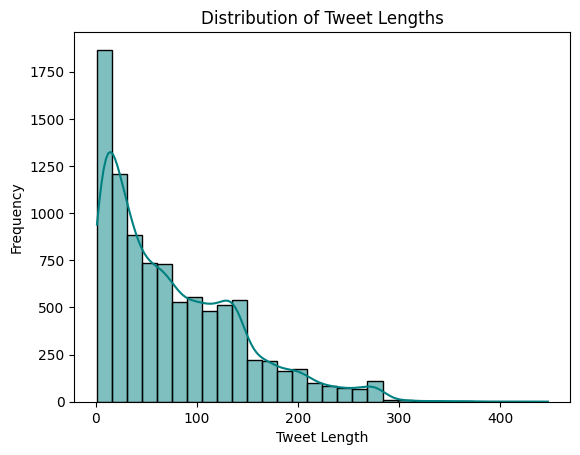

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
df["tweet_length"]=df["tweet"].astype(str).apply(len)
sns.histplot(df["tweet_length"],kde=True,bins=30,color="teal")
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-3610722529.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot (data=df,x="year",palette="coolwarm")


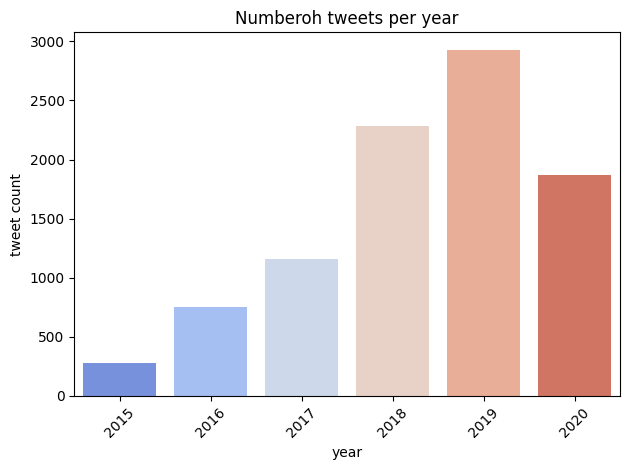

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df["date"]=pd.to_datetime(df["date"], errors="coerce")
df["year"]=df["date"].dt.year
sns.countplot (data=df,x="year",palette="coolwarm")
plt.title("Numberoh tweets per year")
plt.xlabel("year")
plt.ylabel("tweet count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



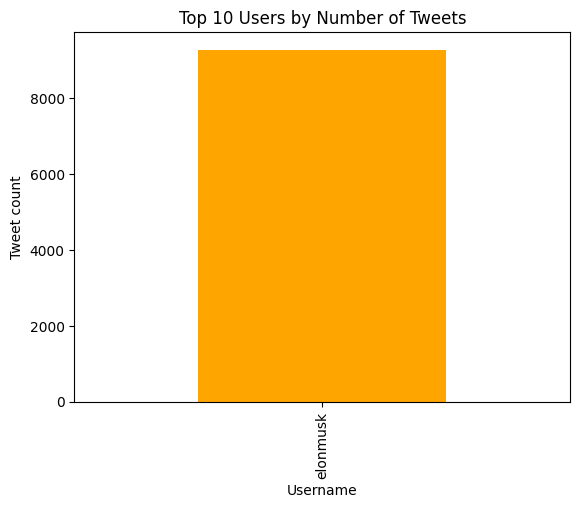

In [9]:
top_users=df["username"].value_counts().head(10)
top_users.plot(kind="bar",color="orange")
plt.title("Top 10 Users by Number of Tweets")
plt.xlabel("Username")
plt.ylabel("Tweet count")
plt.show()

In [10]:
!pip install -q textblob
from textblob import TextBlob

In [11]:
def get_sentiment(text):
  polarity=TextBlob(str(text)).sentiment.polarity
  if polarity>0:
    return "Positive"
  elif polarity==0:
    return "Neutral"
  else:
    return "Negative"
df["sentiment"]=df["tweet"].apply(get_sentiment)
print(df[["tweet","sentiment"]].head())

                                               tweet sentiment
0                                               Cute  Positive
1                                                Wow  Positive
2  Reusability is essential. A rocket that is sin...  Negative
3                                        Wild times!  Positive
4  We’re being extra paranoid. Maximizing probabi...  Positive


In [12]:
from sklearn.model_selection import train_test_split
x=df["tweet"].astype(str)
y=df["sentiment"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report,confusion_matrix
model=Pipeline([
    ("tfidf",TfidfVectorizer(max_features=5000,stop_words="english")),
    ("clf",LogisticRegression(max_iter=1000))

])
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy:/n",accuracy_score(y_test,y_pred))
print("Classification Report:/n",classification_report(y_test,y_pred))

Accuracy:/n 0.8013993541442411
Classification Report:/n               precision    recall  f1-score   support

    Negative       0.82      0.31      0.45       247
     Neutral       0.78      0.90      0.84       758
    Positive       0.82      0.86      0.84       853

    accuracy                           0.80      1858
   macro avg       0.81      0.69      0.71      1858
weighted avg       0.80      0.80      0.79      1858



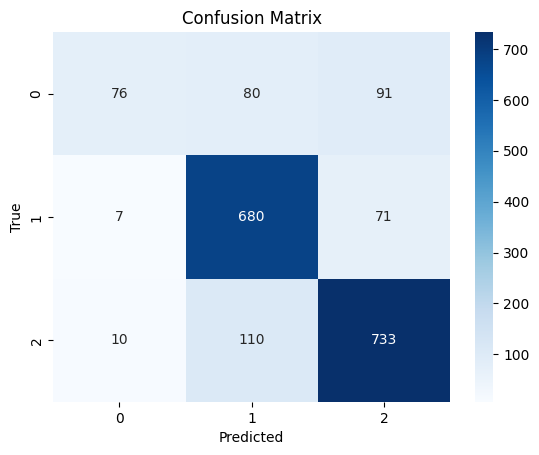

In [15]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [16]:
new_tweets=[
    "Tesla's new update is amazing!",
    "I'm not happy with Twitter's new algorithm.",
    "SpaceX launch was a huge success!"
    "This is just disappointing"

]
predictions=model.predict(new_tweets)
for tweet,sentiment in zip(new_tweets,predictions):
  print(f"Tweet:{tweet}\nPredicted Sentiment:{sentiment}\n")

Tweet:Tesla's new update is amazing!
Predicted Sentiment:Positive

Tweet:I'm not happy with Twitter's new algorithm.
Predicted Sentiment:Positive

Tweet:SpaceX launch was a huge success!This is just disappointing
Predicted Sentiment:Positive



In [17]:
!pip install -q gradio
import gradio as gr
def predict_sentiment(tweet):
  return model.predict([tweet])[0]
iface=gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=3,placeholder="Enter a tweet..."),
    outputs="text",
    title="Elon Musk Sentiment Analyzer",
    description="Enter a tweet related to Elon Musk to classify sentiment as Positive ,Neutral,Negative"

)
iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://367ea9bf07f88ab12f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
